In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

TypeError: bases must be types

In [37]:
df = pd.read_csv('data/marrakech_hotels_reviews.csv')
df.head()

Hotel_Name                     Review_Date  Review_Rating  \
0  72 Riad Living  Rachel R wrote a review Mar 23             50   
1  72 Riad Living   Ron N wrote a review Feb 2023             50   
2  72 Riad Living  puddu101 wrote a review Mar 22             40   
3  72 Riad Living  tephrash wrote a review Mar 18             50   
4  72 Riad Living   David T wrote a review Mar 16             50   

                         Review_Title  \
0         Lovely ambience and service   
1               Top marks well earned   
2                            An Oasis   
3       Beautiful down to the details   
4  Simply brilliant - a special place   

                                         Review_Text  \
0  I honestly couldn't fault Riad 72. The staff a...   
1  We stayed for four nights at 72 Riad Living (w...   
2  With a superb location it felt like an oasis a...   
3  Beautifully designed Riad and perfect setting ...   
4  Wow just simply delightful from the super tran...   

         Reviewer_Date_Of_Stay               Reviewer_Trip_Type  \
0     Date of stay: March 2023  Trip type: Traveled as a couple   
1  Date of stay: February 2023                              NaN   
2  Date of stay: February 2023                              NaN   
3     Date of stay: March 2023  Trip type: Traveled as a couple   
4     Date of stay: March 2023  Trip type: Traveled as a couple   

           Reviewer_Location  \
0  Edinburgh, United Kingdom   
1              Banff, Canada   
2              Mumbai, India   
3                  Singapore   
4                        NaN   

                               Reviewer_Profile_Link  
0   https://www.tripadvisor.com/Profile/rachrichmond  
1         https://www.tripadvisor.com/Profile/Gadman  
2       https://www.tripadvisor.com/Profile/puddu101  
3       https://www.tripadvisor.com/Profile/tephrash  
4  https://www.tripadvisor.com/Profile/V7829ETdavidt

In [38]:
map = {50: 5, 40: 4, 30:3, 20:2, 10:1}
df['Review_Rating'] = df['Review_Rating'].replace(map)
df.head()

Hotel_Name                     Review_Date  Review_Rating  \
0  72 Riad Living  Rachel R wrote a review Mar 23              5   
1  72 Riad Living   Ron N wrote a review Feb 2023              5   
2  72 Riad Living  puddu101 wrote a review Mar 22              4   
3  72 Riad Living  tephrash wrote a review Mar 18              5   
4  72 Riad Living   David T wrote a review Mar 16              5   

                         Review_Title  \
0         Lovely ambience and service   
1               Top marks well earned   
2                            An Oasis   
3       Beautiful down to the details   
4  Simply brilliant - a special place   

                                         Review_Text  \
0  I honestly couldn't fault Riad 72. The staff a...   
1  We stayed for four nights at 72 Riad Living (w...   
2  With a superb location it felt like an oasis a...   
3  Beautifully designed Riad and perfect setting ...   
4  Wow just simply delightful from the super tran...   

         Reviewer_Date_Of_Stay               Reviewer_Trip_Type  \
0     Date of stay: March 2023  Trip type: Traveled as a couple   
1  Date of stay: February 2023                              NaN   
2  Date of stay: February 2023                              NaN   
3     Date of stay: March 2023  Trip type: Traveled as a couple   
4     Date of stay: March 2023  Trip type: Traveled as a couple   

           Reviewer_Location  \
0  Edinburgh, United Kingdom   
1              Banff, Canada   
2              Mumbai, India   
3                  Singapore   
4                        NaN   

                               Reviewer_Profile_Link  
0   https://www.tripadvisor.com/Profile/rachrichmond  
1         https://www.tripadvisor.com/Profile/Gadman  
2       https://www.tripadvisor.com/Profile/puddu101  
3       https://www.tripadvisor.com/Profile/tephrash  
4  https://www.tripadvisor.com/Profile/V7829ETdavidt

**Data Visualization**

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\2390340006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Review_Rating', palette='flare').set_title('Rating Distribution Across Dataset')


Text(0.5, 1.0, 'Rating Distribution Across Dataset')

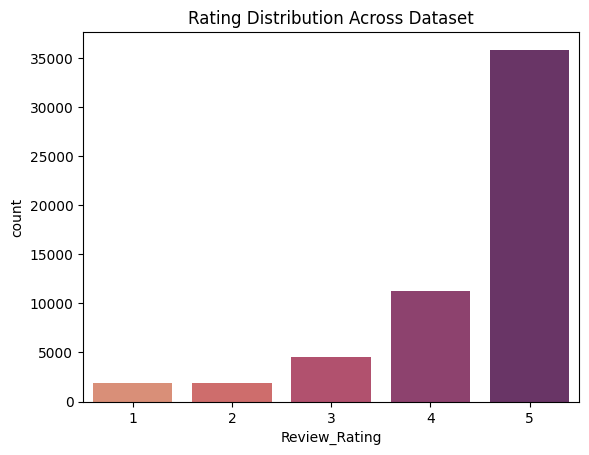

In [39]:
sns.countplot(data=df, x='Review_Rating', palette='flare').set_title('Rating Distribution Across Dataset')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Hotel_Name             55368 non-null  object
 1   Review_Date            55368 non-null  object
 2   Review_Rating          55368 non-null  int64 
 3   Review_Title           55367 non-null  object
 4   Review_Text            55368 non-null  object
 5   Reviewer_Date_Of_Stay  55223 non-null  object
 6   Reviewer_Trip_Type     48448 non-null  object
 7   Reviewer_Location      42099 non-null  object
 8   Reviewer_Profile_Link  55358 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


In [ ]:
# df = df[['Review_Text','Review_Rating']]
# df.columns = ['Review','Rating']

In [41]:
df['Length'] = df['Review_Text'].apply(len)
df.head()

Hotel_Name                     Review_Date  Review_Rating  \
0  72 Riad Living  Rachel R wrote a review Mar 23              5   
1  72 Riad Living   Ron N wrote a review Feb 2023              5   
2  72 Riad Living  puddu101 wrote a review Mar 22              4   
3  72 Riad Living  tephrash wrote a review Mar 18              5   
4  72 Riad Living   David T wrote a review Mar 16              5   

                         Review_Title  \
0         Lovely ambience and service   
1               Top marks well earned   
2                            An Oasis   
3       Beautiful down to the details   
4  Simply brilliant - a special place   

                                         Review_Text  \
0  I honestly couldn't fault Riad 72. The staff a...   
1  We stayed for four nights at 72 Riad Living (w...   
2  With a superb location it felt like an oasis a...   
3  Beautifully designed Riad and perfect setting ...   
4  Wow just simply delightful from the super tran...   

         Reviewer_Date_Of_Stay               Reviewer_Trip_Type  \
0     Date of stay: March 2023  Trip type: Traveled as a couple   
1  Date of stay: February 2023                              NaN   
2  Date of stay: February 2023                              NaN   
3     Date of stay: March 2023  Trip type: Traveled as a couple   
4     Date of stay: March 2023  Trip type: Traveled as a couple   

           Reviewer_Location  \
0  Edinburgh, United Kingdom   
1              Banff, Canada   
2              Mumbai, India   
3                  Singapore   
4                        NaN   

                               Reviewer_Profile_Link  Length  
0   https://www.tripadvisor.com/Profile/rachrichmond     306  
1         https://www.tripadvisor.com/Profile/Gadman    1350  
2       https://www.tripadvisor.com/Profile/puddu101     282  
3       https://www.tripadvisor.com/Profile/tephrash     679  
4  https://www.tripadvisor.com/Profile/V7829ETdavidt     217

In [42]:
df.describe()

Review_Rating        Length
count    55368.00000  55368.000000
mean         4.39745   1026.258579
std          1.00435   1073.084068
min          1.00000     49.000000
25%          4.00000    365.000000
50%          5.00000    674.000000
75%          5.00000   1275.000000
max          5.00000  18351.000000

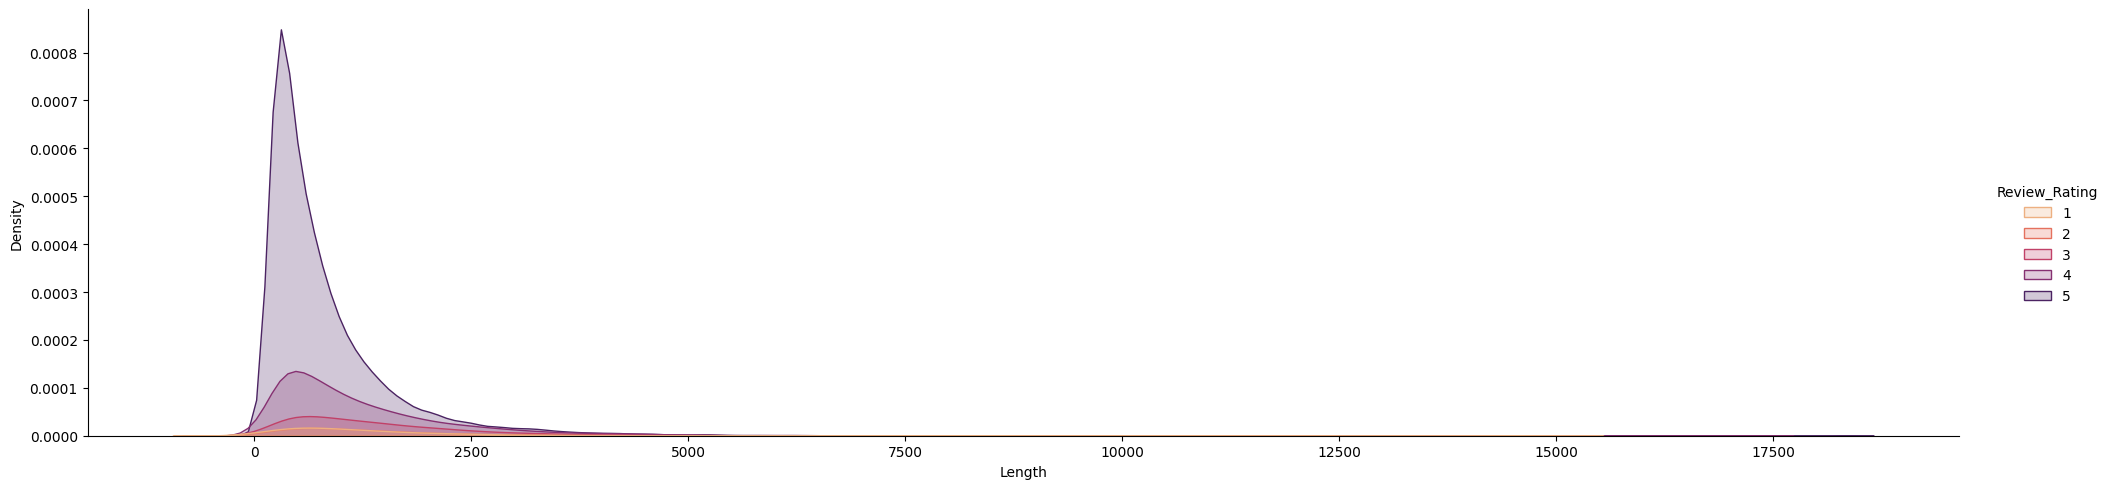

In [44]:
sns.displot(data=df, x='Length', hue='Review_Rating', palette='flare', kind='kde', fill=True, aspect=4)

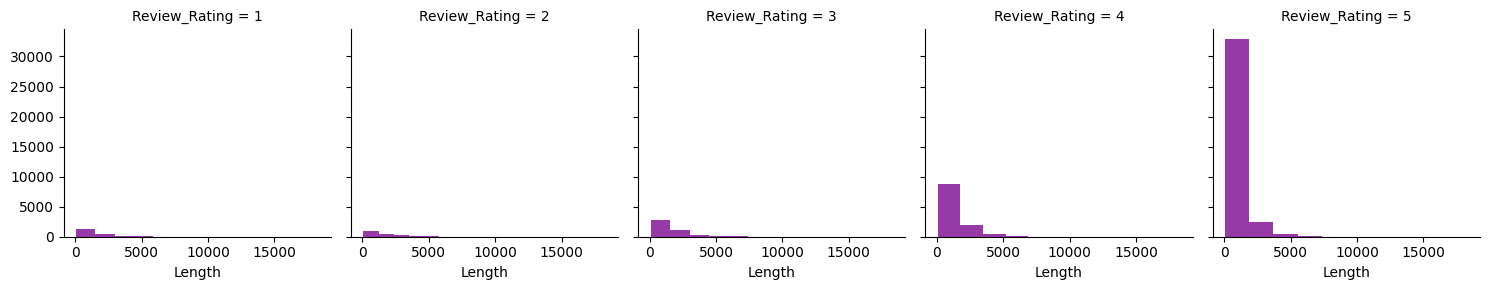

In [45]:
g = sns.FacetGrid(data=df, col='Review_Rating')
g.map(plt.hist, 'Length', color='#973aa8')

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\3214470883.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Review_Rating', y='Length', palette='flare', alpha=0.3)


<Axes: xlabel='Review_Rating', ylabel='Length'>

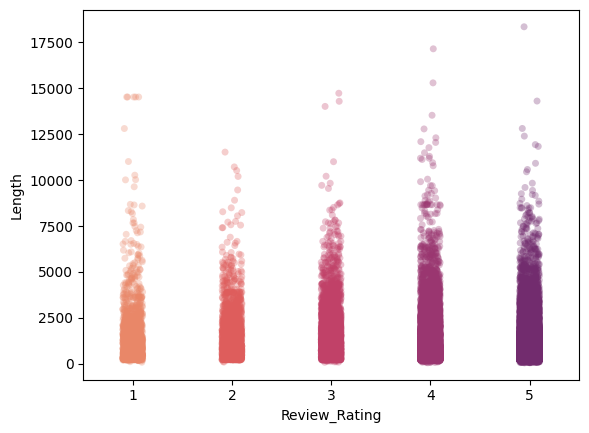

In [46]:
sns.stripplot(data=df, x='Review_Rating', y='Length', palette='flare', alpha=0.3)

In [49]:
# Đếm số khách sạn trong data 
df['Hotel_Name'].nunique()

59

In [51]:
df.groupby('Hotel_Name')['Review_Text'].count().sort_values(ascending=False)[:10]

Hotel_Name
Hotel Riu Tikida Palmeraie                  6248
Aqua Mirage Marrakech Hotel Club            3331
TUI BLUE Riu Tikida Garden                  3205
Aqua Fun Club Marrakech                     3121
La Maison Arabe                             2261
Be Live Collection Marrakech Adults Only    1904
Kenzi Club Agdal Medina                     1754
Four Seasons Resort Marrakech               1622
La Mamounia Marrakech                       1619
Riad Dar Anika                              1607
Name: Review_Text, dtype: int64

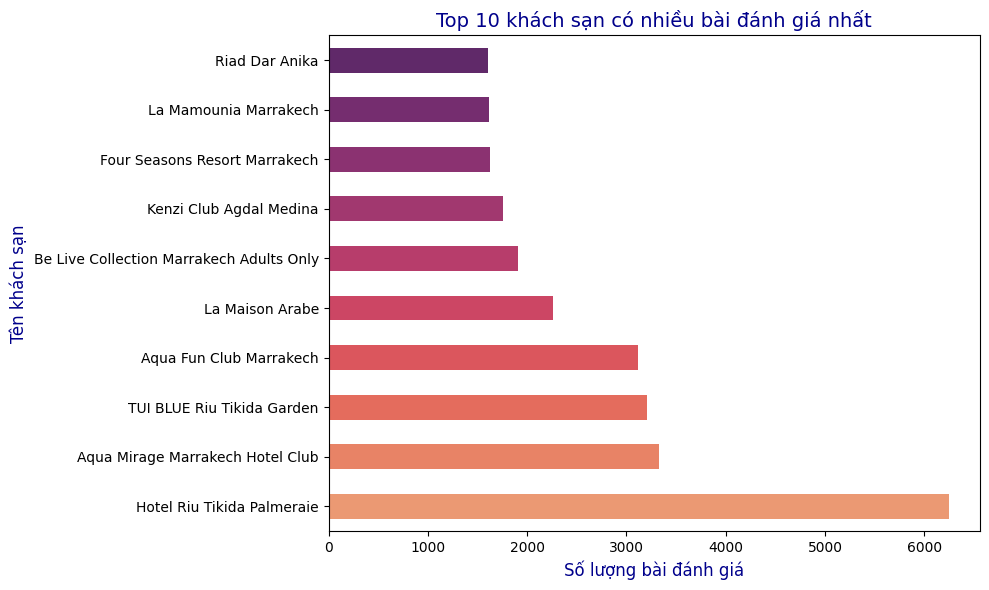

In [53]:
top_10_hotels = df.groupby('Hotel_Name')['Review_Text'].count().sort_values(ascending=False)[:10]

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
top_10_hotels.plot(kind='barh', color=sns.color_palette("flare", n_colors=10))

plt.title('Top 10 khách sạn có nhiều bài đánh giá nhất', fontsize=14, color='darkblue')
plt.xlabel('Số lượng bài đánh giá', fontsize=12, color='darkblue')
plt.ylabel('Tên khách sạn', fontsize=12, color='darkblue')

# # Thiết lập font cho các nhãn và trục
# plt.xticks(fontsize=10, color='darkblue')
# plt.yticks(fontsize=10, color='darkblue')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo nhãn không bị cắt
plt.show()


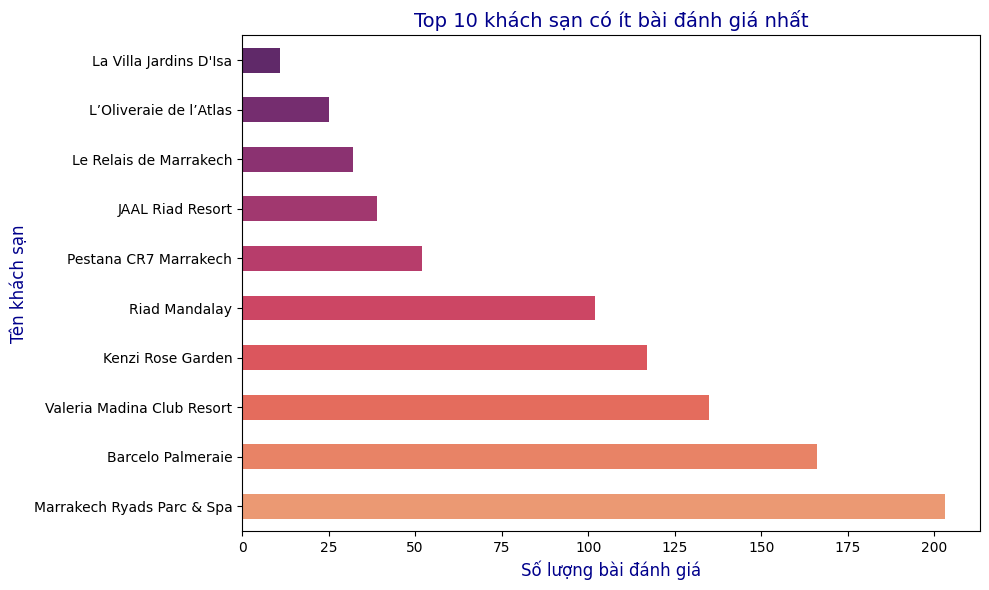

In [54]:
bot_10_hotels = df.groupby('Hotel_Name')['Review_Text'].count().sort_values(ascending=False)[-10:]

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
bot_10_hotels.plot(kind='barh', color=sns.color_palette("flare", n_colors=10))

plt.title('Top 10 khách sạn có ít bài đánh giá nhất', fontsize=14, color='darkblue')
plt.xlabel('Số lượng bài đánh giá', fontsize=12, color='darkblue')
plt.ylabel('Tên khách sạn', fontsize=12, color='darkblue')

# # Thiết lập font cho các nhãn và trục
# plt.xticks(fontsize=10, color='darkblue')
# plt.yticks(fontsize=10, color='darkblue')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo nhãn không bị cắt
plt.show()


In [62]:
def get_count(text):
    if type(text) == str:
        text = text.split(', ')
        return text[-1].title()

In [64]:
df_country = df[['Reviewer_Location','Review_Text']]
df_country['Reviewer_Location'] = df_country['Reviewer_Location'].apply(get_count)
df_country.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\715604285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Reviewer_Location'] = df_country['Reviewer_Location'].apply(get_count)


Reviewer_Location                                        Review_Text
0    United Kingdom  I honestly couldn't fault Riad 72. The staff a...
1            Canada  We stayed for four nights at 72 Riad Living (w...
2             India  With a superb location it felt like an oasis a...
3         Singapore  Beautifully designed Riad and perfect setting ...
4              None  Wow just simply delightful from the super tran...

In [65]:
df_country['Reviewer_Location'].nunique()

1760

In [66]:
df_country.groupby('Reviewer_Location')['Review_Text'].count().sort_values()

Reviewer_Location
Airdrie               1
Airrayd               1
Pierrelatte           1
Pinkpashmina          1
Pinner                1
                  ...  
Morocco             664
California          717
New York            796
London              966
United Kingdom    23340
Name: Review_Text, Length: 1760, dtype: int64

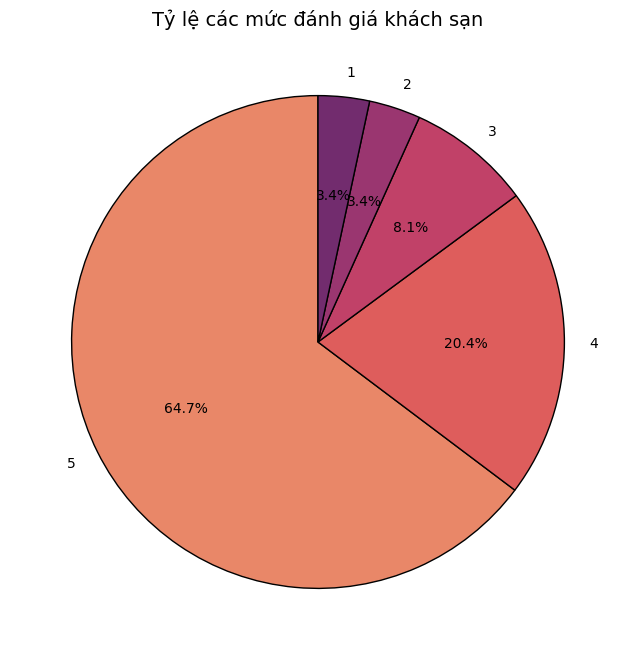

In [67]:
# Giả sử bạn có cột 'Review_Rating' trong DataFrame
rating_counts = df['Review_Rating'].value_counts()

# Vẽ biểu đồ pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette("flare", n_colors=len(rating_counts)), startangle=90, wedgeprops={'edgecolor': 'black'})

# Thiết lập tiêu đề
plt.title('Tỷ lệ các mức đánh giá khách sạn', fontsize=14)

# Hiển thị biểu đồ
plt.show()

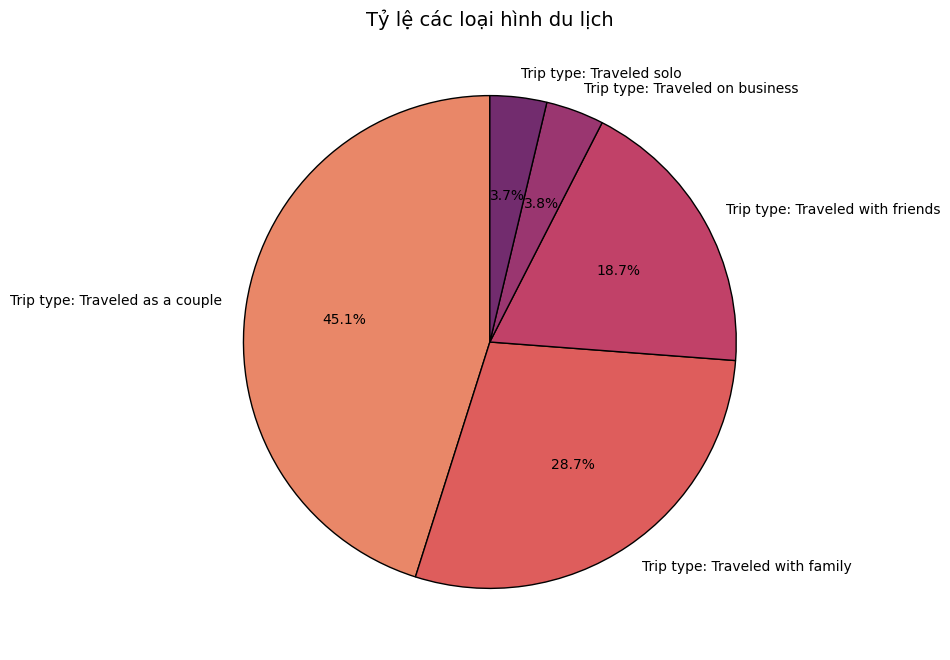

In [68]:
# Giả sử bạn có cột 'Review_Rating' trong DataFrame
trip_type_counts = df['Reviewer_Trip_Type'].value_counts()

# Vẽ biểu đồ pie chart
plt.figure(figsize=(8, 8))
plt.pie(trip_type_counts, labels=trip_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("flare", n_colors=len(rating_counts)), startangle=90, wedgeprops={'edgecolor': 'black'})

# Thiết lập tiêu đề
plt.title('Tỷ lệ các loại hình du lịch', fontsize=14)

# Hiển thị biểu đồ
plt.show()

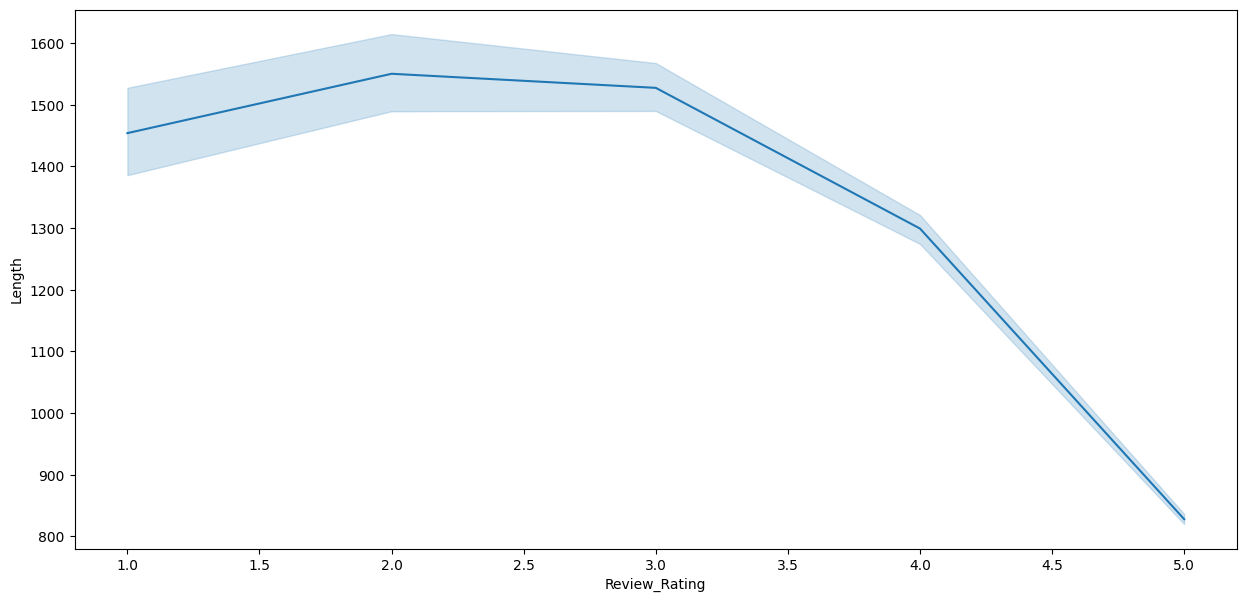

In [70]:
# graph what the the relationship between Rating and Length
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Review_Rating", y="Length")
plt.show()


In [77]:
# Xử lý data imbalanced

# remove duplicates based on "review" column
df = df.drop_duplicates(subset='Review_Text', keep='first')
# filter rows with rating of 5
mask_5 = df['Review_Rating'] == 5
mask_4 = df['Review_Rating'] == 4
mask_3 = df['Review_Rating'] == 3

# randomly remove 5000 rows with rating of 5
remove_indices_5 = np.random.choice(df[mask_5].index, size=32000, replace=False)
remove_indices_4 = np.random.choice(df[mask_4].index, size=9156, replace=False)
remove_indices_3 = np.random.choice(df[mask_3].index, size=3000, replace=False)
df = df.drop(remove_indices_5)
df = df.drop(remove_indices_4)
df = df.drop(remove_indices_3)

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\2390340006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Review_Rating', palette='flare').set_title('Rating Distribution Across Dataset')


Text(0.5, 1.0, 'Rating Distribution Across Dataset')

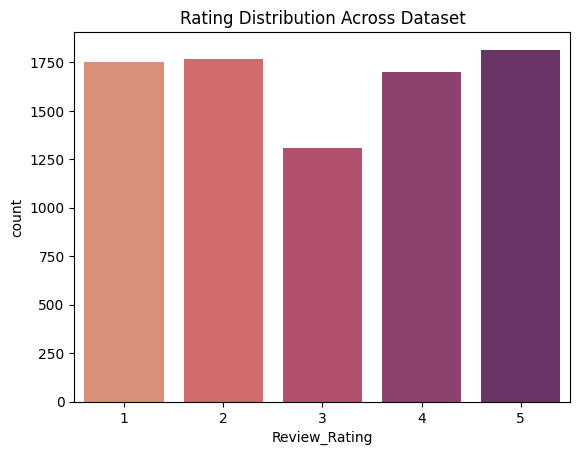

In [79]:
sns.countplot(data=df, x='Review_Rating', palette='flare').set_title('Rating Distribution Across Dataset')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8342 entries, 26 to 55363
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Hotel_Name             8342 non-null   object
 1   Review_Date            8342 non-null   object
 2   Review_Rating          8342 non-null   int64 
 3   Review_Title           8342 non-null   object
 4   Review_Text            8342 non-null   object
 5   Reviewer_Date_Of_Stay  8313 non-null   object
 6   Reviewer_Trip_Type     7282 non-null   object
 7   Reviewer_Location      6458 non-null   object
 8   Reviewer_Profile_Link  8339 non-null   object
 9   Length                 8342 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 716.9+ KB


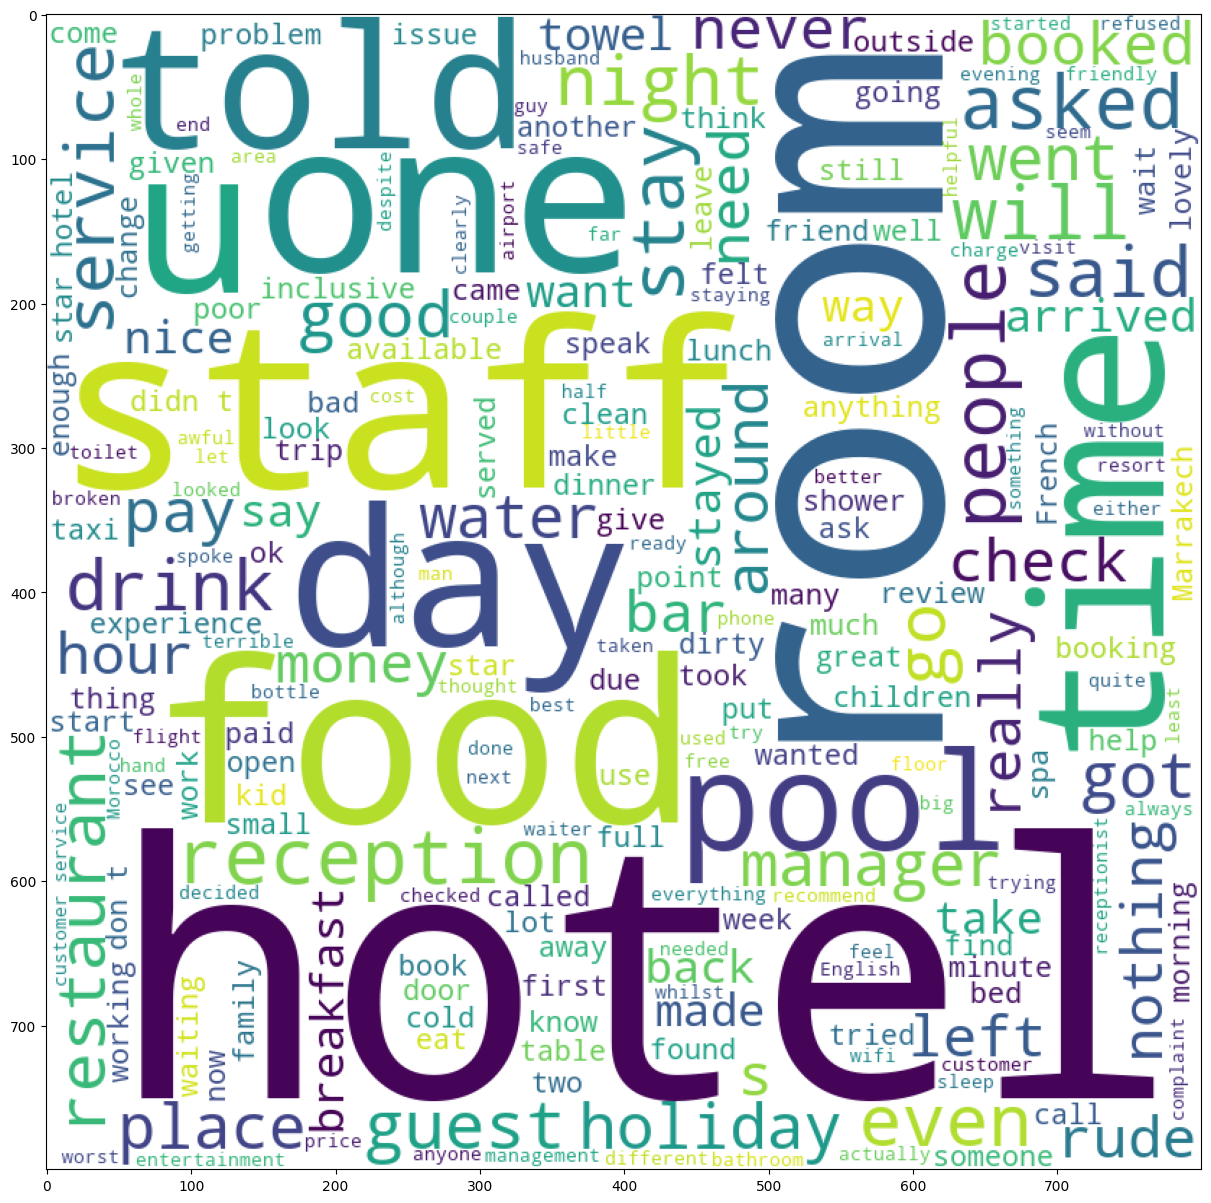

In [86]:
df_1 = df[df['Review_Rating']==1]
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review_Text']))

plt.imshow(wc1)

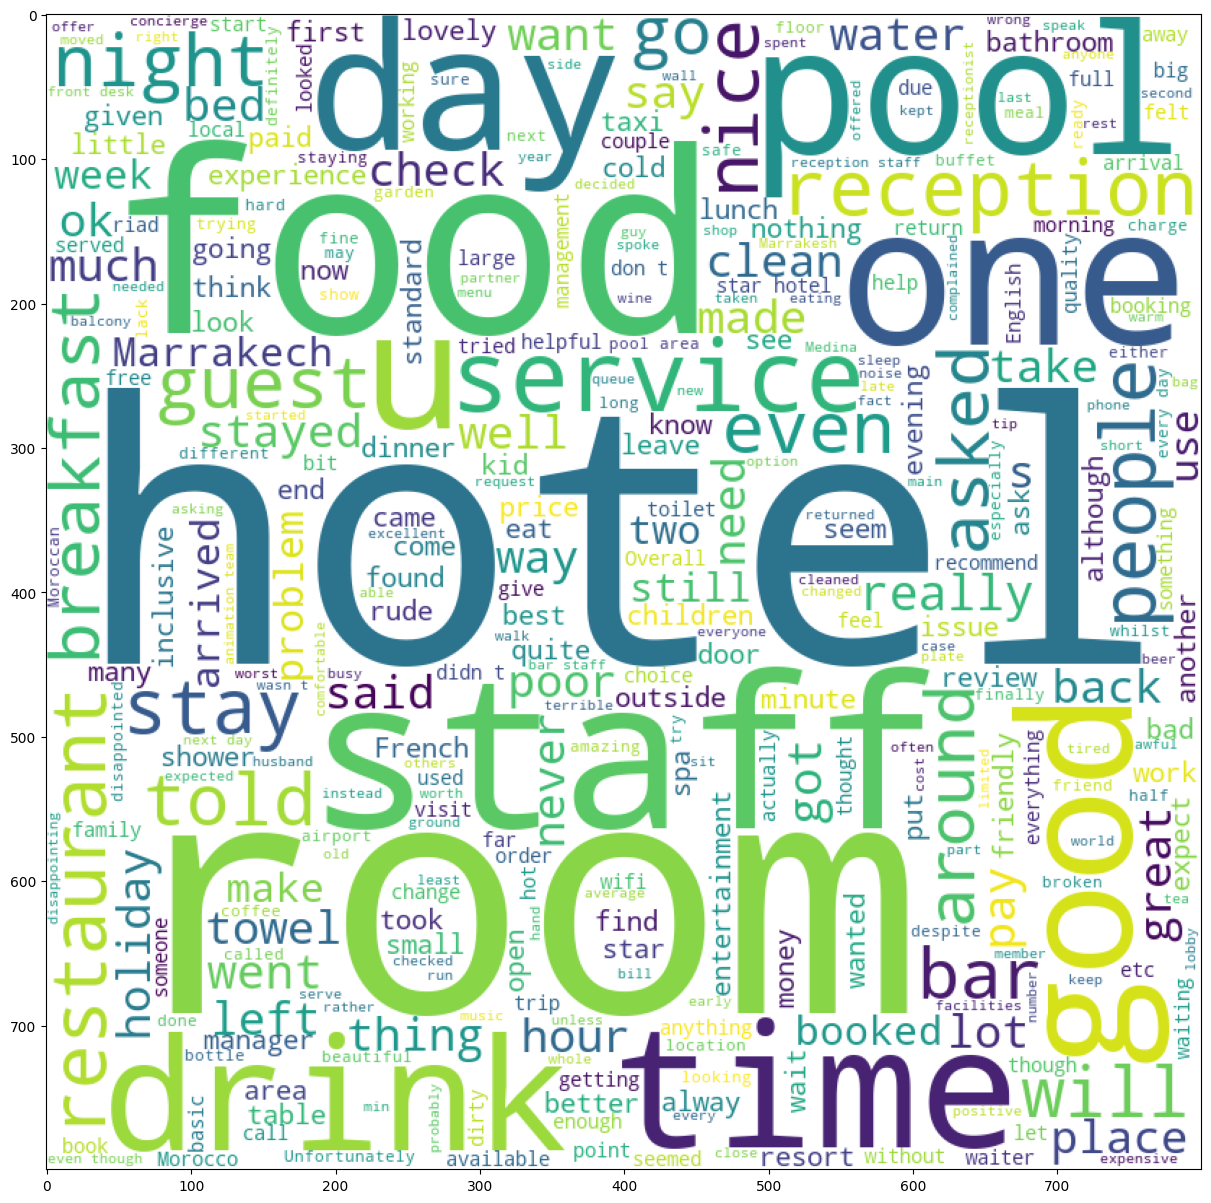

In [87]:
df_2 = df[df['Review_Rating']==2]
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review_Text']))

plt.imshow(wc2)

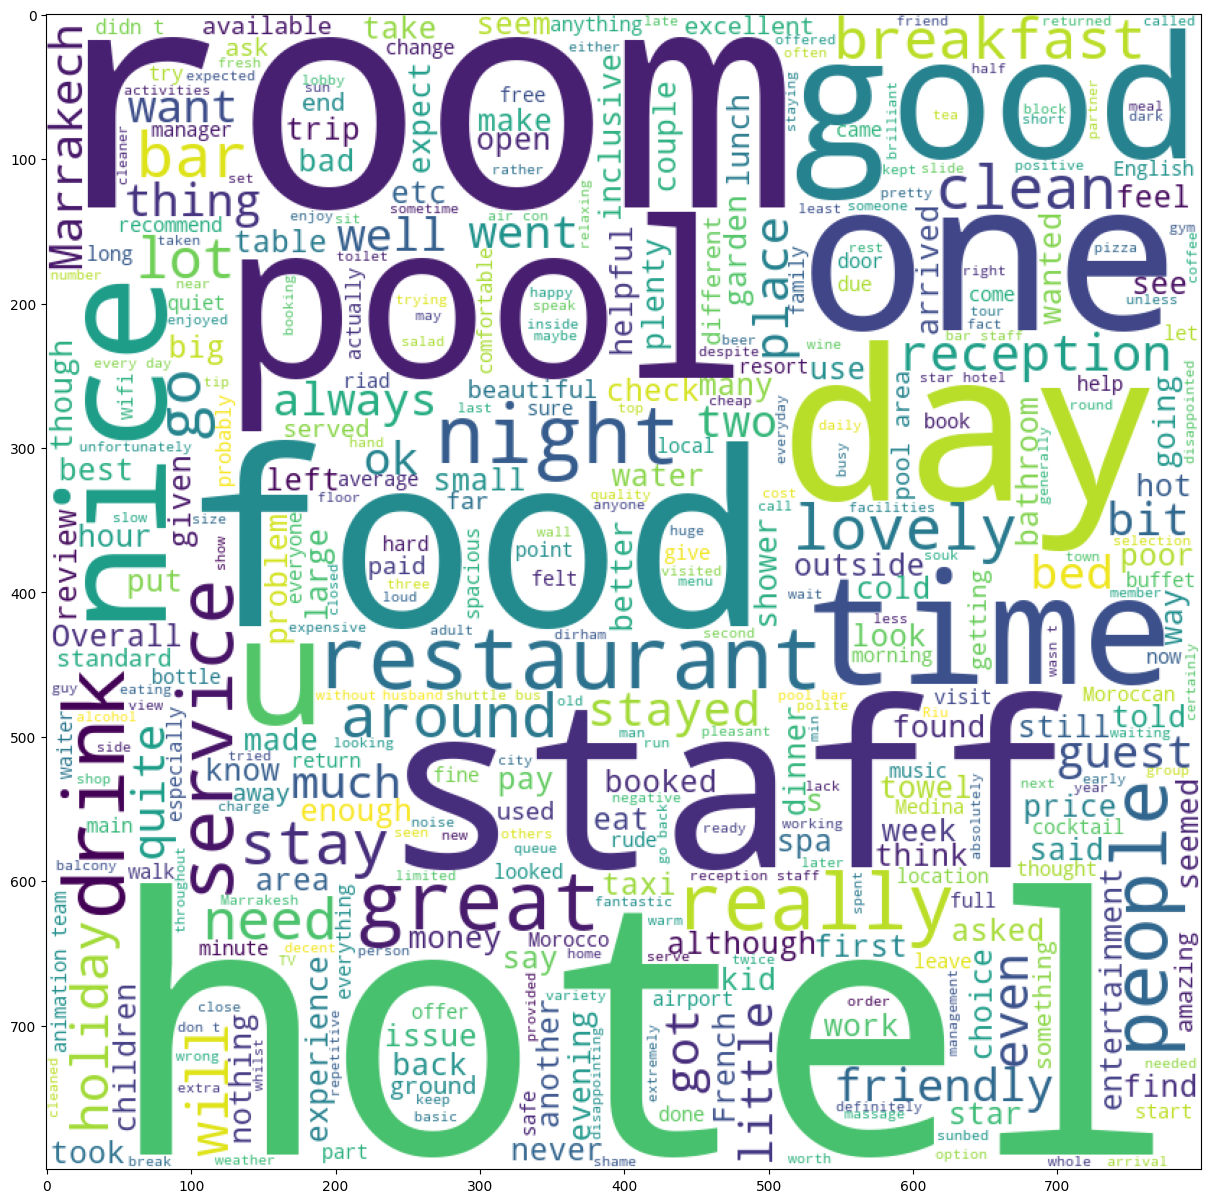

In [88]:
df_3 = df[df['Review_Rating']==3]
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review_Text']))

plt.imshow(wc3)

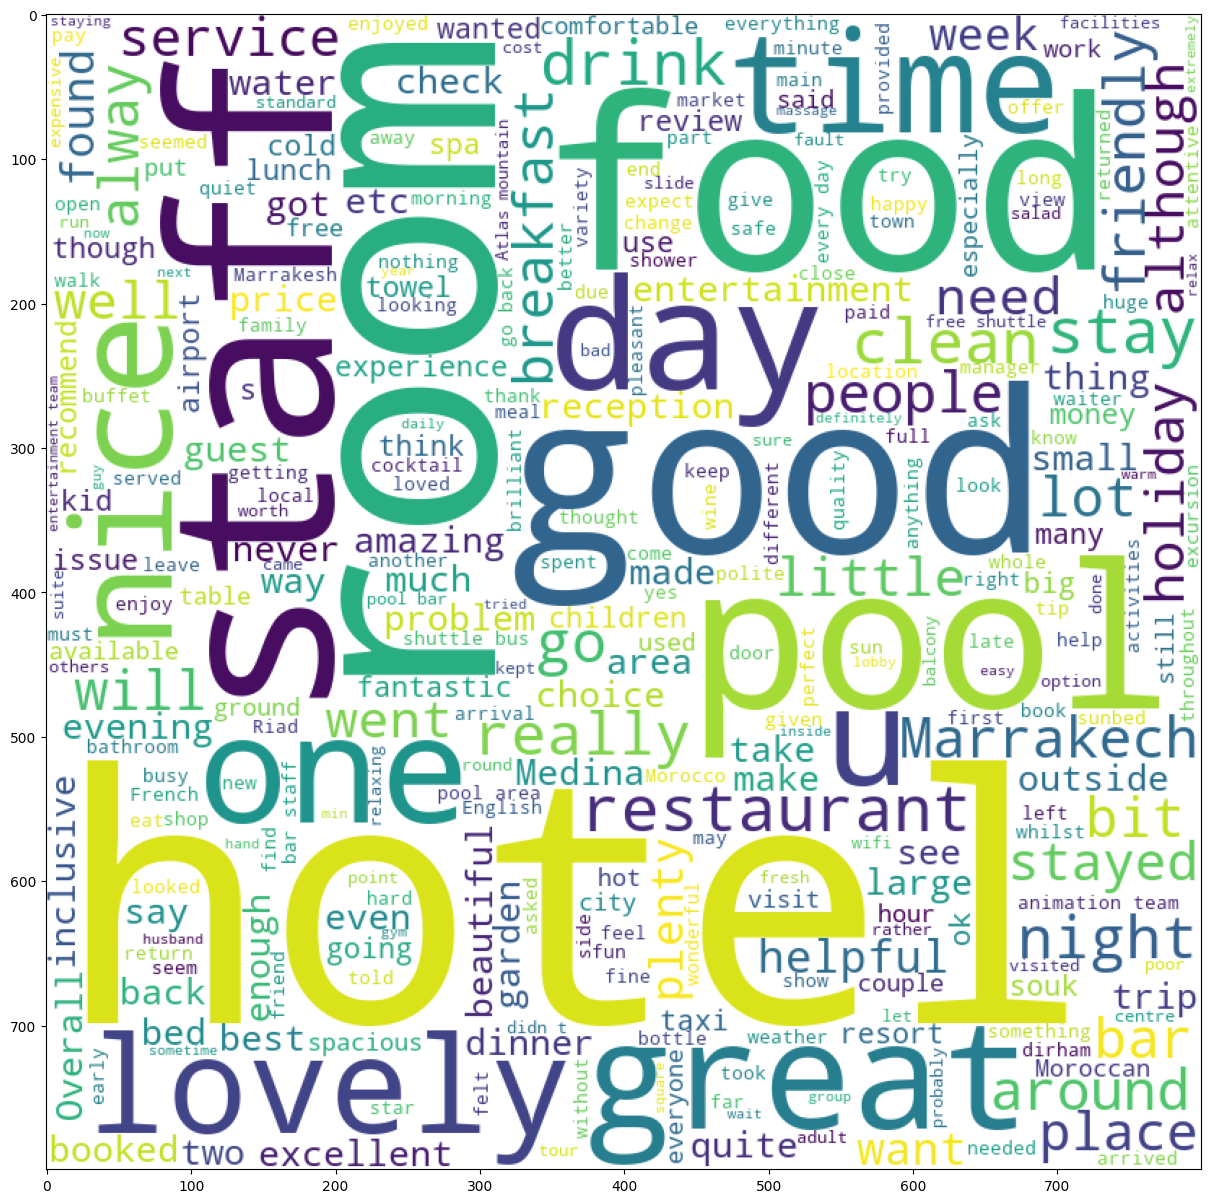

In [89]:
df_4 = df[df['Review_Rating']==4]
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review_Text']))

plt.imshow(wc4)

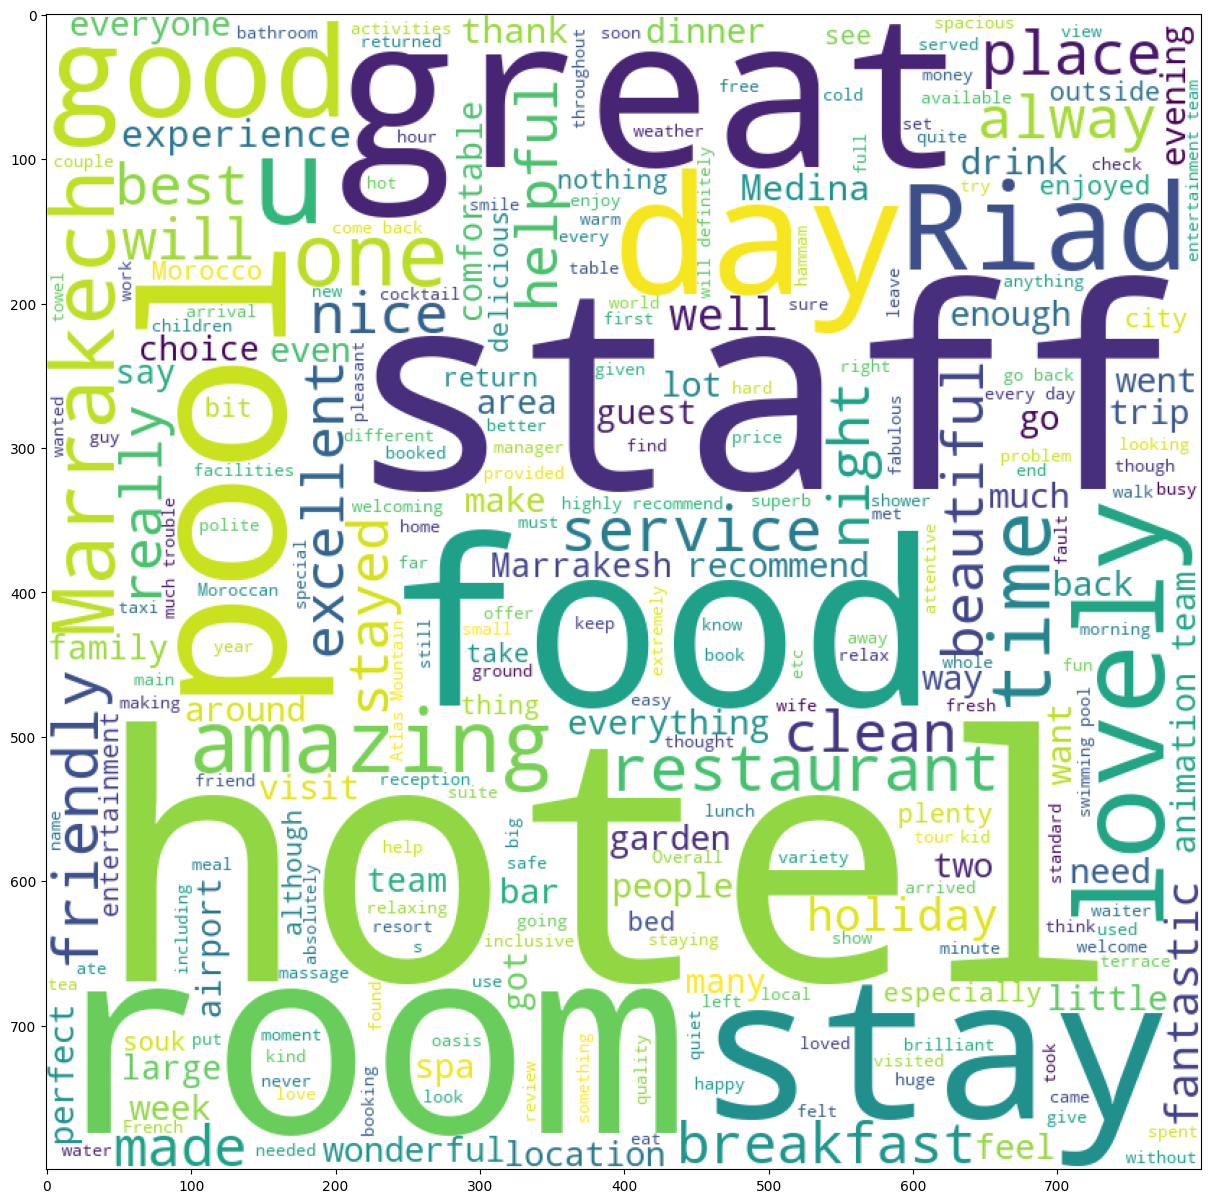

In [90]:
df_5 = df[df['Review_Rating']==5]
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review_Text']))

plt.imshow(wc5)

High rating --> Long review

In [91]:
df_old = df.copy()

**Text Preprocessing**

In [92]:
def rating(score):
    if score > 3:
        return 'Good'
    # elif score == 3:
    #     return 'Netral'
    else:
        return 'Bad'

In [94]:
df = df[['Review_Rating','Review_Text','Length']]
df.columns = ['Rating','Review','Length']

In [95]:
df['Rating'] = df['Rating'].apply(rating)
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\2653180090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].apply(rating)


Rating                                             Review  Length
26   Good  Very nice place to stay! Super-helpfull staff....     287
32   Good  We have just come back from a short break stay...    1144
46   Good  You step in to the Riad 72 from the narrow bus...    1323
48   Good  Very lovely Riad that felt safe and was extrem...     459
65   Good  Riad72 is designed with the visitor in mind. A...     279

In [96]:
enc = {'Good':1, 'Bad':0}
df['Rating'] = df['Rating'].replace(enc)
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_9464\990472546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rating'] = df['Rating'].replace(enc)
C:\Users\PC\AppData\Local\Temp\ipykernel_9464\990472546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].replace(enc)


Rating                                             Review  Length
26       1  Very nice place to stay! Super-helpfull staff....     287
32       1  We have just come back from a short break stay...    1144
46       1  You step in to the Riad 72 from the narrow bus...    1323
48       1  Very lovely Riad that felt safe and was extrem...     459
65       1  Riad72 is designed with the visitor in mind. A...     279

In [97]:
# Total word in dataset before cleaning
length = df['Length'].sum()
length

np.int64(10839294)

**Stemming and Lemming**

In [98]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [100]:
df.head()

Rating                                             Review  Length
26       1  Very nice place to stay! Super-helpfull staff....     287
32       1  We have just come back from a short break stay...    1144
46       1  You step in to the Riad 72 from the narrow bus...    1323
48       1  Very lovely Riad that felt safe and was extrem...     459
65       1  Riad72 is designed with the visitor in mind. A...     279

In [101]:
df['Review_N'] = df['Review'].apply(cleaning)
df['Length_N'] = df['Review_N'].apply(len)
new_length = df['Length_N'].sum()

print(f'Total of text length before cleaning: {length}')
print(f'Total of text length after cleaning: {new_length}')

Total of text length before cleaning: 10839294
Total of text length after cleaning: 6472918


C:\Users\PC\AppData\Local\Temp\ipykernel_9464\1980939032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_N'] = df['Review'].apply(cleaning)
C:\Users\PC\AppData\Local\Temp\ipykernel_9464\1980939032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length_N'] = df['Review_N'].apply(len)


In [102]:
df.head()

Rating                                             Review  Length  \
26       1  Very nice place to stay! Super-helpfull staff....     287   
32       1  We have just come back from a short break stay...    1144   
46       1  You step in to the Riad 72 from the narrow bus...    1323   
48       1  Very lovely Riad that felt safe and was extrem...     459   
65       1  Riad72 is designed with the visitor in mind. A...     279   

                                             Review_N  Length_N  
26  nice place stay superhelpfull staff room big c...       191  
32  come back short break stay 72 riad live experi...       650  
46  step riad 72 narrow bustle streets close heart...       800  
48  lovely riad felt safe extremely peaceful staff...       292  
65  riad72 design visitor mind authentic moroccan ...       191

In [103]:
df.to_csv('data/cleaned_df2.csv', index=False)

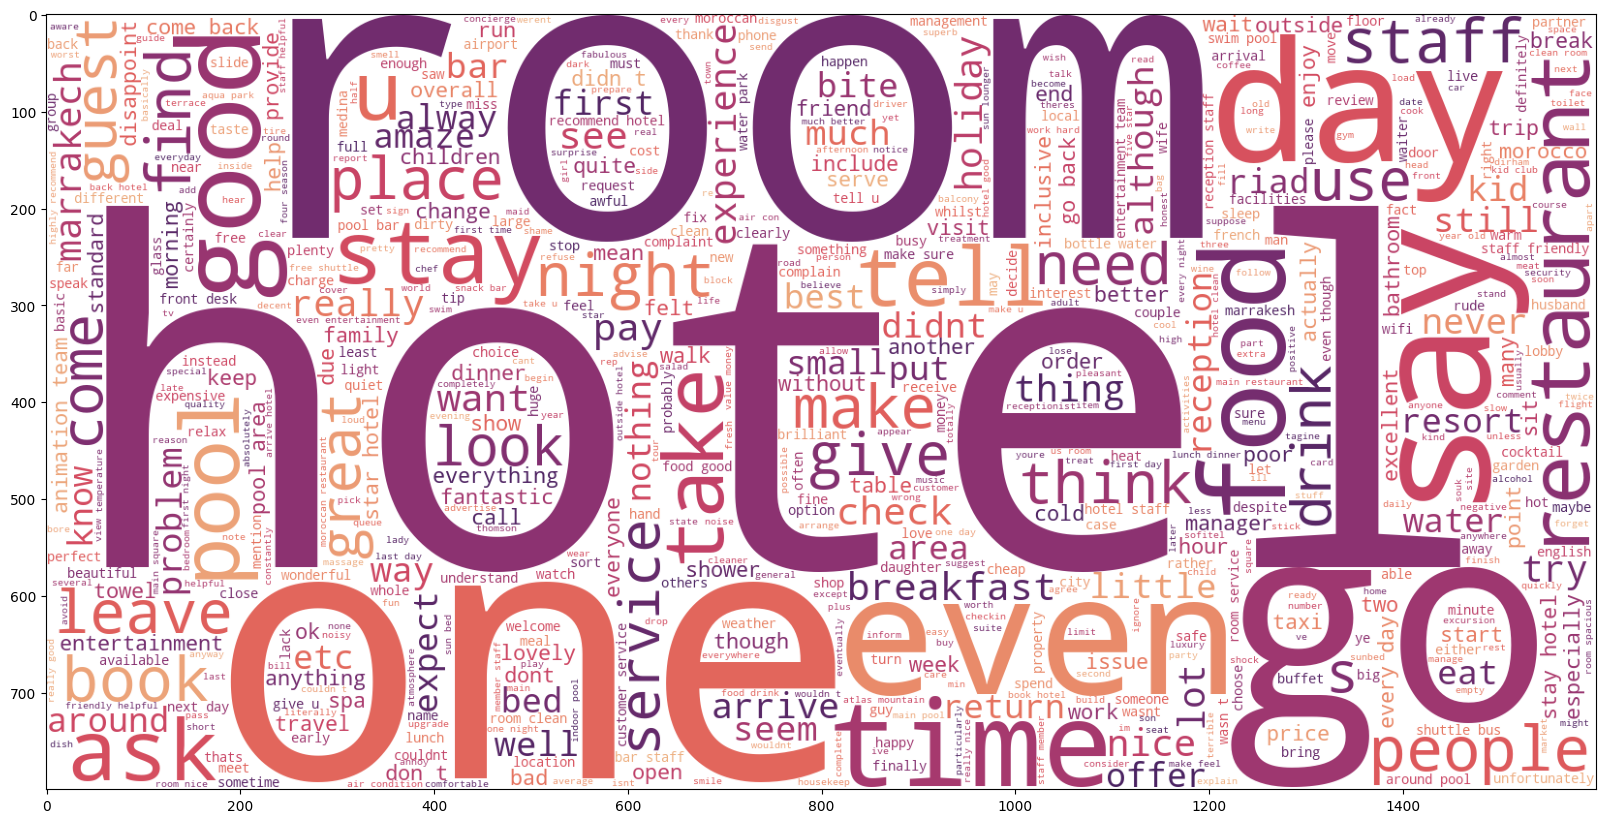

In [55]:
# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white", colormap='flare').generate(' '.join(df['Review_N']))

plt.imshow(wc)

In [107]:
df['Rating'].value_counts()

Rating
0    4827
1    3515
Name: count, dtype: int64

In [ ]:
# df = pd.read_csv('data/cleaned_df.csv')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df['Review_N'], df['Rating'], test_size=0.2)

In [109]:
X_train

34746    spend week le meridien n’fis begin january it’...
49091    4 star 1 star quality service actually lose sp...
18558    get back one week stay hotelarrived give cockt...
18024    return palmeraie swelter week think main thing...
20706    stay socalled 5star hotel want get pamper comf...
                               ...                        
35400    minimum requirements half decent hotel clean b...
17308    sadly although ground well care accommodation ...
6173     return 14night stay aqua mirage first visit mo...
10876    lovely stay beautiful hotel quite good 5 star ...
20448    i’ll concise hope it’ll helpful stay 6 days ch...
Name: Review_N, Length: 6673, dtype: object

**Building model with sklearn**

In [110]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

In [114]:
# Chuyển ma trận sparse thành mảng dày đặc (dense array)
dense_train_tfid = train_tfid_matrix.toarray()

# Chuyển mảng dày đặc thành DataFrame để dễ dàng xem
df_train_tfid = pd.DataFrame(dense_train_tfid)

# Hiển thị 5 dòng đầu tiên
df_train_tfid.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   25897  25898  25899  25900  25901  25902  25903  25904  25905  25906  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 25907 columns]

In [59]:
pickle.dump(tfid, open('model/tfidf.pkl', 'wb'))

In [60]:
models = [BernoulliNB(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000)]

In [61]:
accuracy = []
precision = []
recall = []
f1_score = []

for model in models:
    model.fit(train_tfid_matrix, y_train)
    y_pred = model.predict(test_tfid_matrix)

    # Accuracy
    accuracy.append(model.score(test_tfid_matrix, y_test))

    # Precision, Recall, F1 Score
    report = classification_report(y_test, y_pred, output_dict=True)
    precision.append(report['macro avg']['precision'])
    recall.append(report['macro avg']['recall'])
    f1_score.append(report['macro avg']['f1-score'])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix for", type(model).__name__)
    print(cm)
    print()

Confusion Matrix for BernoulliNB
[[645 352]
 [104 568]]

Confusion Matrix for RandomForestClassifier
[[916  81]
 [166 506]]

Confusion Matrix for SVC
[[904  93]
 [ 92 580]]

Confusion Matrix for LogisticRegression
[[908  89]
 [ 92 580]]



In [62]:
# DataFrame with accuracy, precision, recall, and F1 score
models_name = ['BernoulliNB', 'RandomForestClassifier', 'SVC','LogisticRegression']
results = pd.DataFrame({
    'Model': models_name,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

In [63]:
results

Model  Accuracy  Precision    Recall  F1 Score
0             BernoulliNB  0.726783   0.739270  0.746089  0.726200
1  RandomForestClassifier  0.852007   0.854295  0.835866  0.842503
2                     SVC  0.889155   0.884722  0.884908  0.884814
3      LogisticRegression  0.891552   0.887483  0.886914  0.887195

In [64]:
train_tfid_matrix[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28 stored elements and shape (1, 26025)>

In [65]:
log = LogisticRegression(max_iter=1000)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

In [73]:
pickle.dump(log, open('model/ml_model.pkl', 'wb'))

In [69]:
test = df.iloc[0]
test

Review      Very nice place to stay! Super-helpfull staff....
Rating                                                      1
Length                                                    287
Review_N    nice place stay superhelpfull staff room big c...
Length_N                                                  191
Name: 26, dtype: object

In [71]:
test.iloc[0]

'Very nice place to stay! Super-helpfull staff. The rooms were big clean and really nice. The breakfast was good with bread fruit eggs and more.    The riad is located a short walk from the main square but still enough distance to avoid noise and traffic.    Would recommend staying here.'

In [18]:
ml = pickle.load(open('model/ml_model.pkl','rb'))
tfidf = pickle.load(open('model/tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return 'Bad' if pred==0 else 'Good', pred_proba[0][idx]

ml_predict(test.iloc[0])

NameError: name 'test' is not defined

In [76]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[908  89]
 [ 92 580]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       997
           1       0.87      0.86      0.87       672

    accuracy                           0.89      1669
   macro avg       0.89      0.89      0.89      1669
weighted avg       0.89      0.89      0.89      1669



**Build model with tensorflow**

In [4]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

Total distinct words: 27695


In [5]:
pickle.dump(tokenizer, open('model/tokenizer.pkl', 'wb'))

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=total_word, output_dim=8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          bias_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
import numpy as np

max_index = total_word - 1  # Chỉ số lớn nhất có thể có trong Embedding
print("Max allowed index:", max_index)

# Kiểm tra xem có giá trị nào vượt quá không
if np.max(train_padded) >= total_word or np.max(test_padded) >= total_word:
    print("❌ Có giá trị vượt quá phạm vi Embedding!")
else:
    print("✅ Dữ liệu hợp lệ.")


Max allowed index: 27694
❌ Có giá trị vượt quá phạm vi Embedding!


In [8]:
train_padded = np.where(train_padded >= total_word, 1, train_padded)
test_padded = np.where(test_padded >= total_word, 1, test_padded)

In [10]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_padded, y_train, epochs=25, validation_data=(test_padded, y_test))

Epoch 1/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 72s 328ms/step - accuracy: 0.5793 - loss: 0.7032 - val_accuracy: 0.5794 - val_loss: 0.6962
Epoch 2/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 68s 323ms/step - accuracy: 0.5795 - loss: 0.6961 - val_accuracy: 0.5794 - val_loss: 0.6906
Epoch 3/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 69s 328ms/step - accuracy: 0.5758 - loss: 0.6877 - val_accuracy: 0.5794 - val_loss: 0.6233
Epoch 4/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 67s 322ms/step - accuracy: 0.5707 - loss: 0.6209 - val_accuracy: 0.5806 - val_loss: 0.5605
Epoch 5/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 68s 325ms/step - accuracy: 0.6076 - loss: 0.5657 - val_accuracy: 0.7579 - val_loss: 0.5045
Epoch 6/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 67s 321ms/step - accuracy: 0.7611 - loss: 0.5171 - val_accuracy: 0.8191 - val_loss: 0.4871
Epoch 7/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 68s 328ms/step - accuracy: 0.7806 - loss: 0.5106 - val_accuracy: 0.8370 - val_loss: 0.4671
Epoch 8/25
209/209 ━━━━━━━━━━━━━━━━━━━━ 67s 321ms/step - accuracy: 0.8177 - loss: 0

<Axes: >

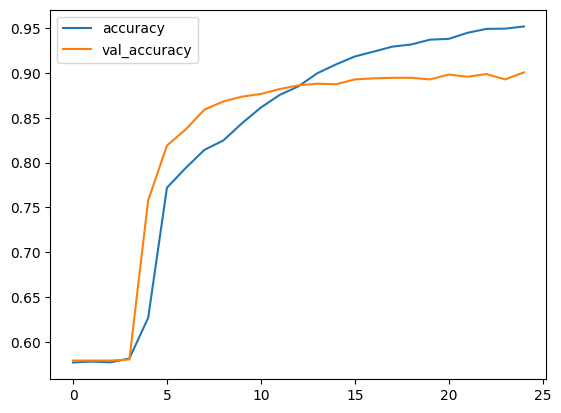

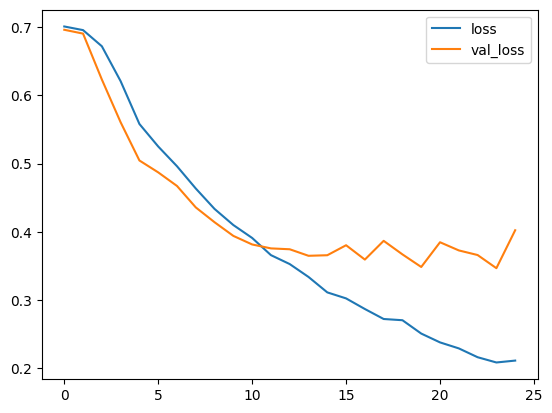

In [11]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_probs = model.predict(test_padded)
pred_labels = (pred_probs > 0.5).astype(int).flatten()
true_labels = y_test
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
[[908  59]
 [107 595]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       967
           1       0.91      0.85      0.88       702

    accuracy                           0.90      1669
   macro avg       0.90      0.89      0.90      1669
weighted avg       0.90      0.90      0.90      1669

Accuracy: 0.9005392450569203
Precision: 0.9097859327217125
Recall: 0.8475783475783476
F1 Score: 0.8775811209439528


In [13]:
model.save('model/dl_model.h5')

In [14]:
# Logistic Regression
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfid.transform([clean_text])
    pred = log.predict(tfid_matrix)[0]

    return pred

# Deep Neural Network
def dl_predict(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model.predict(padded)
    # # Get the label name back
    # lb = LabelBinarizer()
    # result = lb.inverse_transform(pred)[0]

    return round(float(pred[0]),0)

In [19]:
text = 'Such a comfy place to stay with the loved one'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text)))
print('Prediction using DNN: {}'.format(dl_predict(text)))

Prediction using Logistic Regression: ('Good', np.float64(0.8757798047367342))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Prediction using DNN: 1.0


C:\Users\PC\AppData\Local\Temp\ipykernel_9464\3741697656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(pred[0]),0)


In [20]:
text2 = 'Awful room services and slow wifi connection'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text2)))
print('Prediction using DNN: {}'.format(dl_predict(text2)))

Prediction using Logistic Regression: ('Bad', np.float64(0.9271602324583734))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction using DNN: 0.0


C:\Users\PC\AppData\Local\Temp\ipykernel_9464\3741697656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(pred[0]),0)


In [21]:
text3 = 'Hard to get here but the scenery is wonderful'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text3)))
print('Prediction using DNN: {}'.format(dl_predict(text3)))

Prediction using Logistic Regression: ('Good', np.float64(0.6275636636165767))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction using DNN: 1.0


C:\Users\PC\AppData\Local\Temp\ipykernel_9464\3741697656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(pred[0]),0)


In [22]:
text4 = 'This hotel is approx one mile to the west of the :as Vegas strip on Tropicana . It features a 21 story T shaped hotel and a large casino. There are multiple food choices available. From a steak house to a food court and several in-between. The rooms are over-sized and contain a couch and full sized comfortable chair. The only thing negative is the fact there was not a coffee maker, which was available in the past. The staff from check-in, to the food servers, slot hosts, cocktail servers, housekeeping, security, casino cage, to check-out were very friendly and professional. The pool area was big, clean, and very well taken care of. I have stayed here and at many other Boyd properties in the past and still feel they give a good bang for the buck!'
print('Prediction using Logistic Regression: {}'.format(ml_predict(text4)))
print('Prediction using DNN: {}'.format(dl_predict(text4)))

Prediction using Logistic Regression: ('Bad', np.float64(0.5341877489088184))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction using DNN: 1.0


C:\Users\PC\AppData\Local\Temp\ipykernel_9464\3741697656.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(pred[0]),0)


In [13]:
import pickle
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [15]:
with open('model/tokenizer.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

In [16]:
def dl_predict(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model.predict(padded)
    # # Get the label name back
    # lb = LabelBinarizer()
    # result = lb.inverse_transform(pred)[0]

    return round(float(pred[0]),0)

In [17]:
# # Tải mô hình từ file .h5
model = tf.keras.models.load_model('model/dl_model.h5')

In [18]:
text4 = 'This hotel is approx one mile to the west of the :as Vegas strip on Tropicana . It features a 21 story T shaped hotel and a large casino. There are multiple food choices available. From a steak house to a food court and several in-between. The rooms are over-sized and contain a couch and full sized comfortable chair. The only thing negative is the fact there was not a coffee maker, which was available in the past. The staff from check-in, to the food servers, slot hosts, cocktail servers, housekeeping, security, casino cage, to check-out were very friendly and professional. The pool area was big, clean, and very well taken care of. I have stayed here and at many other Boyd properties in the past and still feel they give a good bang for the buck!'
print('Prediction using DNN: {}'.format(dl_predict(text4)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Prediction using DNN: 1.0


/var/folders/4c/c9068fm57wx9ky5bbw7nw9c40000gn/T/ipykernel_8105/1129233515.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return round(float(pred[0]),0)
